<a href="https://colab.research.google.com/github/JKTajo/20250714_count_TAX/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-2

In [2]:
import requests
import pandas as pd
import json
import numpy as np

# url 및 api key 설정
url = 'http://openapi.seoul.go.kr:8088/5a6d4349626a756e35364a70467556/json/energyUseDataSummaryInfo/1/5/'
api_key = '5a6d4349626a756e35364a70467556'

# 원하는 데이터 수집
def get_year_months():
    year_months = []
    for year in range(2020, 2024+1):
        for month in range(1,12+1):
            year_months.append(f'{year}{month:02d}')
    return year_months

year_months_list = get_year_months()

sum_data = []

for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    new_url = f'{url}{year}/{month}/'
    try:
        response = requests.get(new_url, timeout=5)
        response.raise_for_status()
        data = response.json()
        if data.get('energyUseDataSummaryInfo'):
            rows = data['energyUseDataSummaryInfo'].get('row',[])
            for r in rows:
                if r.get('MM_TYPE') == '개인':
                    extracted = {
                    'YEAR' : r.get('YEAR'),
                    'MON' : r.get('MON'),
                    'MM_TYPE' : r.get('MM_TYPE'),
                    'EUS' : r.get('EUS'),
                    'GUS' : r.get('GUS'),
                    'WUS' : r.get('WUS'),
                    'HUS' : r.get('HUS'),
                }
                    sum_data.append(extracted)

    except requests.exceptions.RequestException as e:
        print(f"API 호출실패: {year_month}, {e}")
    except json.JSONDecodeError:
        print(f"JSON 파싱 실패 : {year_month}, {e}")
    finally:
        print("처리 완료")



print(sum_data)

처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
[{'YEAR': '2020', 'MON': '02', 'MM_TYPE': '개인', 'EUS': '254879033', 'GUS': '76363768', 'WUS': '14052828.8', 'HUS': '20848668.612'}, {'YEAR': '2020', 'MON': '03', 'MM_TYPE': '개인', 'EUS': '244369714', 'GUS': '64367515', 'WUS': '13841531', 'HUS': '14194450.151'}, {'YEAR': '2020', 'MON': '04', 'MM_TYPE': '개인', 'EUS': '247831442', 'GUS': '48373693', 'WUS': '14618775.2', 'HUS': '8499792.566'}, {'YEAR': '2020', 'MON': '08', 'MM_TYPE': '개인', 'EUS': '320723239', 'GUS': '10177428', 'WUS': '15600097.8', 'HUS': '286814.663'}, {'YEAR': '2020', 'MON': '11', 'MM_TYPE': '개인', 'EUS': '247308528', 'GUS': '30095679', 'WUS': '14835013.9', 'HUS': '12882

2-1

In [3]:
# 데이터프레임화
# json 파일 저장
with open('energy.json', mode='w', encoding = 'utf-8')as f:
    json.dump(sum_data, f, indent = 4, ensure_ascii=False)

# dataframe 생성
df = pd.DataFrame(sum_data)
# 데이터 측정
df.describe()
df
# DataFrame 인덱스 출력
print(df.index)
# DataFrame 컬럼 출력
print(df.columns)
# DataFrame 행 출력
print(df.values.tolist())
# DataFrame 값 출력
print(df.values.flatten())
# DataFrame의 크기
print(df.shape)
# 요약
print(df.describe())


RangeIndex(start=0, stop=43, step=1)
Index(['YEAR', 'MON', 'MM_TYPE', 'EUS', 'GUS', 'WUS', 'HUS'], dtype='object')
[['2020', '02', '개인', '254879033', '76363768', '14052828.8', '20848668.612'], ['2020', '03', '개인', '244369714', '64367515', '13841531', '14194450.151'], ['2020', '04', '개인', '247831442', '48373693', '14618775.2', '8499792.566'], ['2020', '08', '개인', '320723239', '10177428', '15600097.8', '286814.663'], ['2020', '11', '개인', '247308528', '30095679', '14835013.9', '12882737.572'], ['2020', '12', '개인', '265370372', '51095720', '15036546.3', '26512966.052'], ['2021', '01', '개인', '287882528', '80955422', '14273105.8', '31069705.783'], ['2021', '02', '개인', '271224712', '85581769', '13679936.9', '22238103.26'], ['2021', '05', '개인', '241741576', '24638403', '14312460.916', '2246730.037'], ['2021', '06', '개인', '254958704', '18898880', '15174790.6', '396903.273'], ['2021', '07', '개인', '334733756', '9631171', '16619105.064', '5529269.058'], ['2021', '08', '개인', '409719040', '10205066'

2-2

In [4]:
# 연도 컬럼 추가
df['YEAR'] = pd.to_datetime(df['YEAR'])
df['year'] = df['YEAR'].dt.year

#계절 컬럼 추가
df['MON'] = df['MON'].astype(int)
df['season'] = df['MON'].map(lambda x : '봄' if 3 <= x <= 5
                                      else '여름' if 6 <= x <= 8
                                      else '가을' if 9 <= x <= 11
                                      else '겨울')
df[['MON','season']]

,MON,season
0,2,겨울
1,3,봄
2,4,봄
3,8,여름
4,11,가을
5,12,겨울
6,1,겨울
7,2,겨울
8,5,봄
9,6,여름


3-1

In [2]:
# 한글 처리를 위한 matplotlib 설정 (1)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,549 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and dire

In [5]:
# 한글 처리를 위한 matplotlib 설정 (2)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

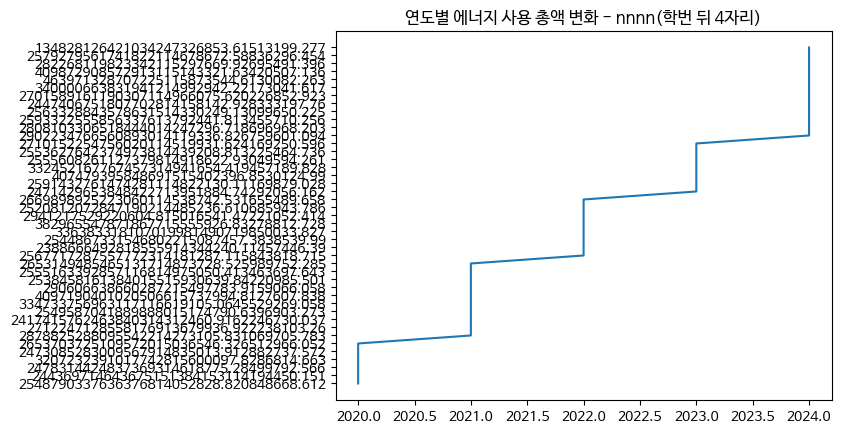

In [6]:
# 연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방) 변화량을 선그래프로 시각화
# EUS+GUS+WUS+HUS

import matplotlib.pyplot as plt
df['sum'] = df[['EUS','GUS','WUS','HUS']].sum(axis=1)

plt.plot(df['year'],df['sum'])
plt.title('연도별 에너지 사용 총액 변화 - nnnn(학번 뒤 4자리)')
plt.show()

3-2

  season           GUS
0     가을  1.590677e+07
1     겨울  6.213356e+07
2      봄  4.356154e+07
3     여름  1.119381e+07


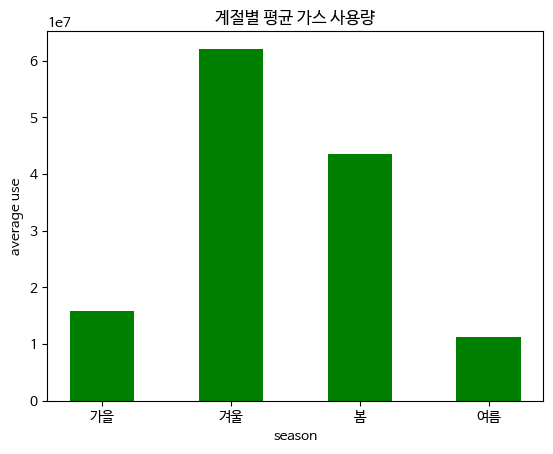

In [31]:
# 계절별 가스 사용량 평균을 막대 그래프로 시각화
season_mean = df.groupby('season')['GUS'].mean().reset_index()
print(season_mean)

import matplotlib.pyplot as plt

## 데이터 정의
categories = season_mean['season']
values = season_mean['GUS']

## 막대 그래프 그리기
plt.bar(categories, values, width=0.5, color='green')
plt.xlabel('season')
plt.ylabel('average use')
plt.title('계절별 평균 가스 사용량')
plt.show()

4. 연도별 에너지 사용량 변화에서 나타나는 주요 트렌드를 찾아 분서갛고, 그 원인을 추론하여 200자 내외로 설명하시오.